## Домашнее задание 4 "Бутстреп"

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats

number_in_list = 18

# 5.1

# 5.2

In [2]:
Nsize = 1000

p_beta = 0.5 # todo calc from beta

In [3]:
sample_bin = stats.binom.rvs(size=Nsize, n=50, p=p_beta)

eff_est = np.zeros(Nsize)
eff_est_disp = np.zeros(Nsize)
est = np.zeros(Nsize)
est_disp = np.zeros(Nsize)

In [4]:
def effEstim(x):
    return np.average(x) / 50
def estim(x):
    return x[0] / 50
def fisher(n, theta):
    return 50 * n / (theta * (1. - theta))

In [5]:
for n in range(Nsize):
    eff_est[n] = effEstim(sample_bin[:n + 1])
    est[n] = estim(sample_bin[:n + 1])
    eff_est_disp[n] = stats.moment([effEstim(stats.binom.rvs(50, eff_est[n], size = n+1)) for i in range(500)], 2)
    est_disp[n] = stats.moment([estim(stats.binom.rvs(50, est[n], size = n+1)) for i in range(500)], 2)

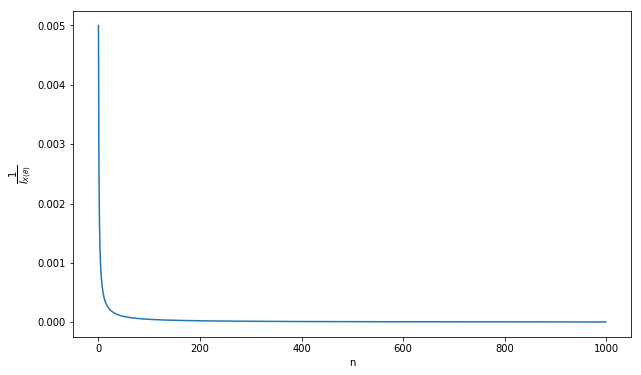

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(Nsize), [1. / fisher(i + 1, p_beta) for i in range(Nsize)])
plt.xlabel('n')
plt.ylabel('$\\dfrac{1}{I_{X(\\theta)}}$')
plt.show()


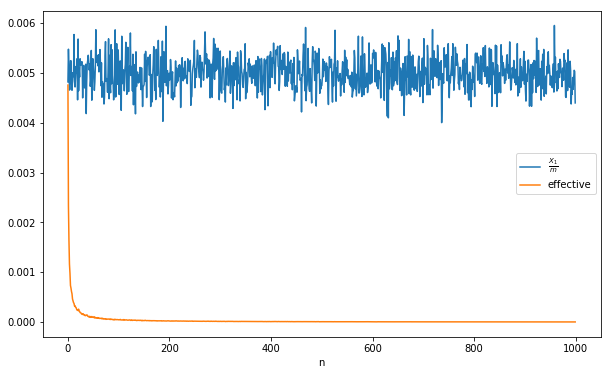

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(Nsize), est_disp, label='$\\frac{X_1}{m}$')
plt.plot(range(Nsize), eff_est_disp, label='effective')
plt.xlabel('n')
plt.legend()
plt.show()

# 5.3

In [8]:
Nsize = 1000
a = number_in_list
lamb = 40 - a

In [ ]:
sample = np.random.exponential(1/lamb, 1000) 
sample = sample + [a / lamb for item in sample]
#bootstrap_sample = np.random.choice(sample, size=(1000, n))